In [2]:
import sys

sys.path.append('../')

In [3]:
from networks import ConditionGenerator
from train_condition import get_opt

import os
from PIL import Image

import torch
from torch import nn
import numpy as np

import lovely_tensors as lt
lt.monkey_patch()

In [4]:
opt = get_opt()

In [7]:
opt.data_list

'train_pairs.txt'

In [6]:
opt.semantic_nc

13

In [8]:
from pathlib import Path
sorted(list(Path('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dense').rglob('*[!_r].png')))

[Path('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dense/020714_5.png')]

In [97]:
data = np.load('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dense/020714_5_uv.npz')

In [98]:
uv_torch = torch.tensor(data['uv'])

In [99]:
label = Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dense/020714_5.png')

In [100]:
import torchvision.transforms as transforms
tt = transforms.ToTensor()

In [101]:
uv_torch.shape

torch.Size([2, 1024, 768])

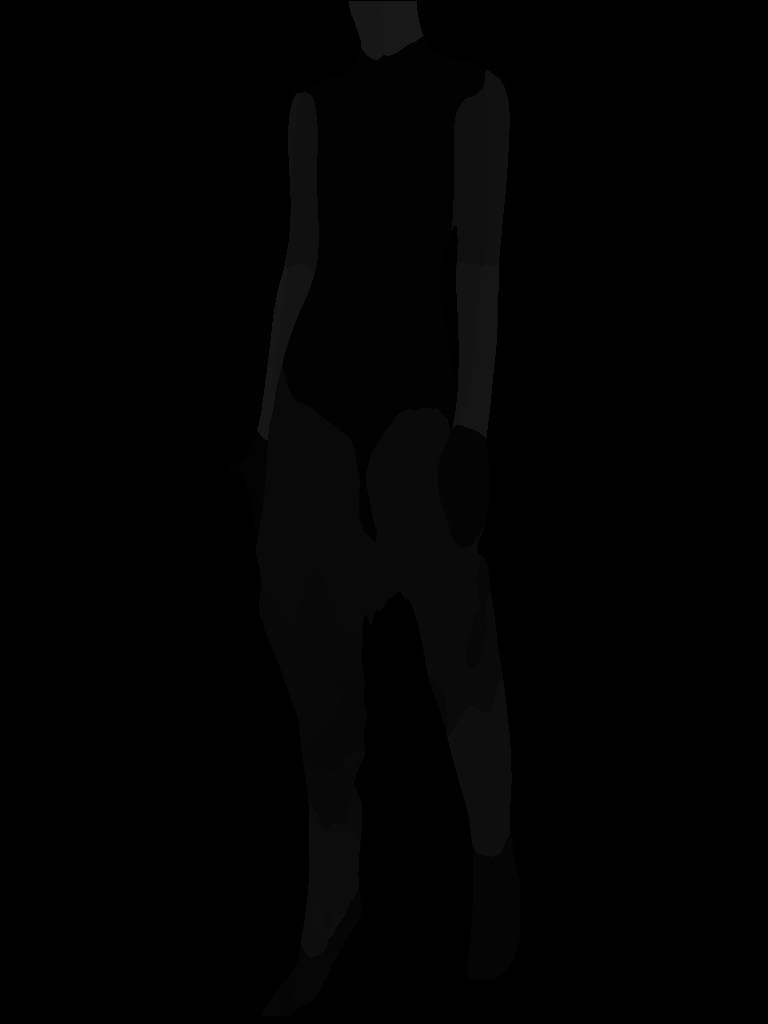

In [102]:
label

In [130]:
label = tt(Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/label_maps/020714_4.png'))

In [134]:
torch.unique(uv_torch[0])

tensor[167495] x∈[-0.007, 1.013] μ=0.509 σ=0.210

In [147]:
iuv_array = torch.cat(
                (uv_torch * 255.0, label)
            ).type(torch.uint8)

In [148]:
iuv_array.shape

torch.Size([3, 1024, 768])

In [149]:
np.transpose(iuv_array.numpy(), (1,2,0)).shape

(1024, 768, 3)

In [150]:
iuv_img = Image.fromarray(np.transpose(iuv_array.numpy(), (1,2,0)),"RGB")

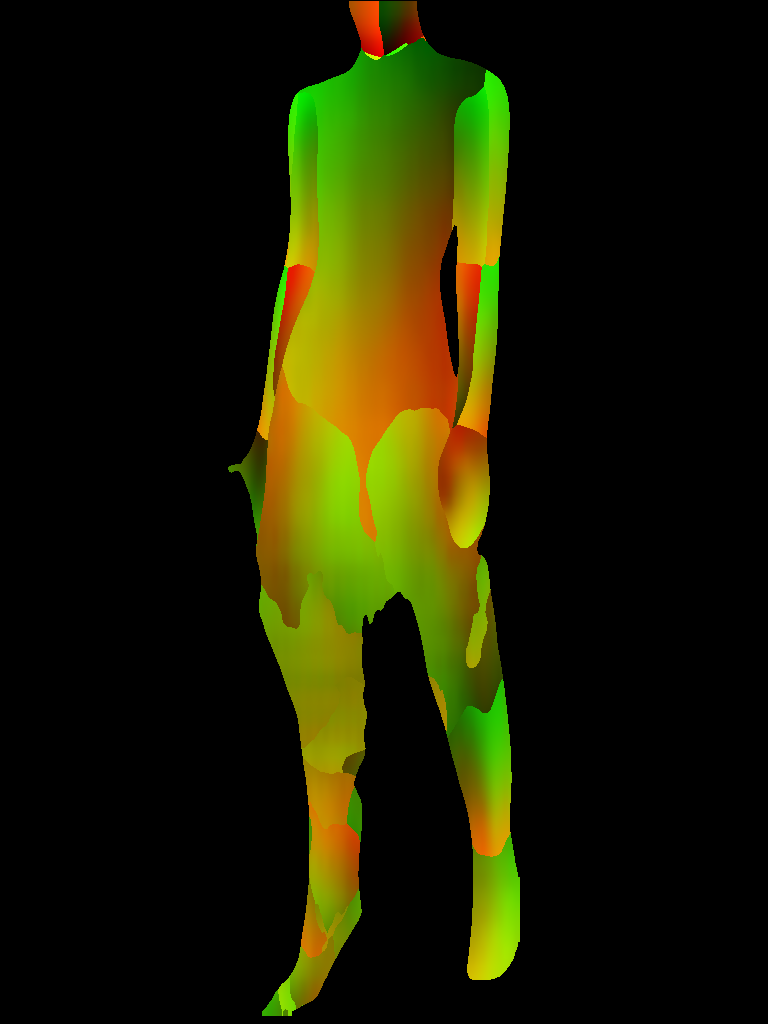

In [151]:
iuv_img

In [128]:
a = tt(Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/train/image-densepose/00000_00.jpg'))[0]

In [129]:
torch.unique(a).v

tensor[232] x∈[0., 1.000] μ=0.509 σ=0.303
tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137, 0.3176,
        0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3569, 0.3608, 0.3686, 0.3765,
        0.3882, 0.3922, 0.4000, 0.4039, 0.4078, 0.4157, 0.4196, 0.4314, 0.4392,
        0.4431, 0.4588, 0.4784, 0.4941, 0.4980, 0.5020, 0.5059, 0.5098, 0.5137

In [108]:
torch.unique(label_torch).v

tensor[23] x∈[0., 0.094] μ=0.049 σ=0.029
tensor([0.0000, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314, 0.0353,
        0.0392, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706, 0.0745,
        0.0784, 0.0824, 0.0863, 0.0902, 0.0941])

In [103]:
label_torch = tt(label)

In [104]:
label_torch.shape

torch.Size([1, 1024, 768])

In [106]:
# total = torch.cat([label_torch, uv_torch], dim=0)
total = torch.cat([uv_torch, label_torch], dim=0)

In [90]:
total_np = np.transpose(total.numpy(), (1,2,0))

In [91]:
total_np.shape

(1024, 768, 3)

In [95]:
np.min(total_np), np.max(total_np)

(-0.02742732, 1.0130107)

In [94]:
np.unique(total_np)

array([-0.02742732, -0.02630136, -0.02491158, ...,  1.011933  ,
        1.0126207 ,  1.0130107 ], dtype=float32)

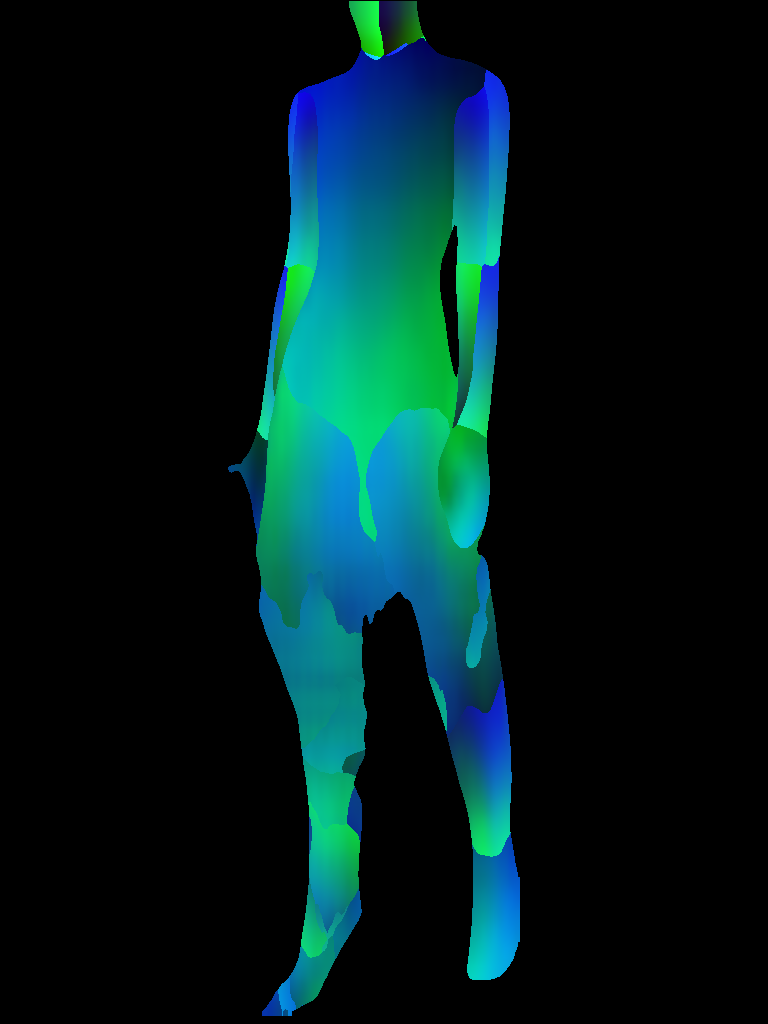

In [96]:
pil_image = Image.fromarray((total_np * 255).astype(np.uint8))
pil_image

In [29]:
image_array = data['uv'a][0]
image_array.shape

(1024, 768)

In [34]:
image = Image.fromarray(np.uint8(image_array * 255))

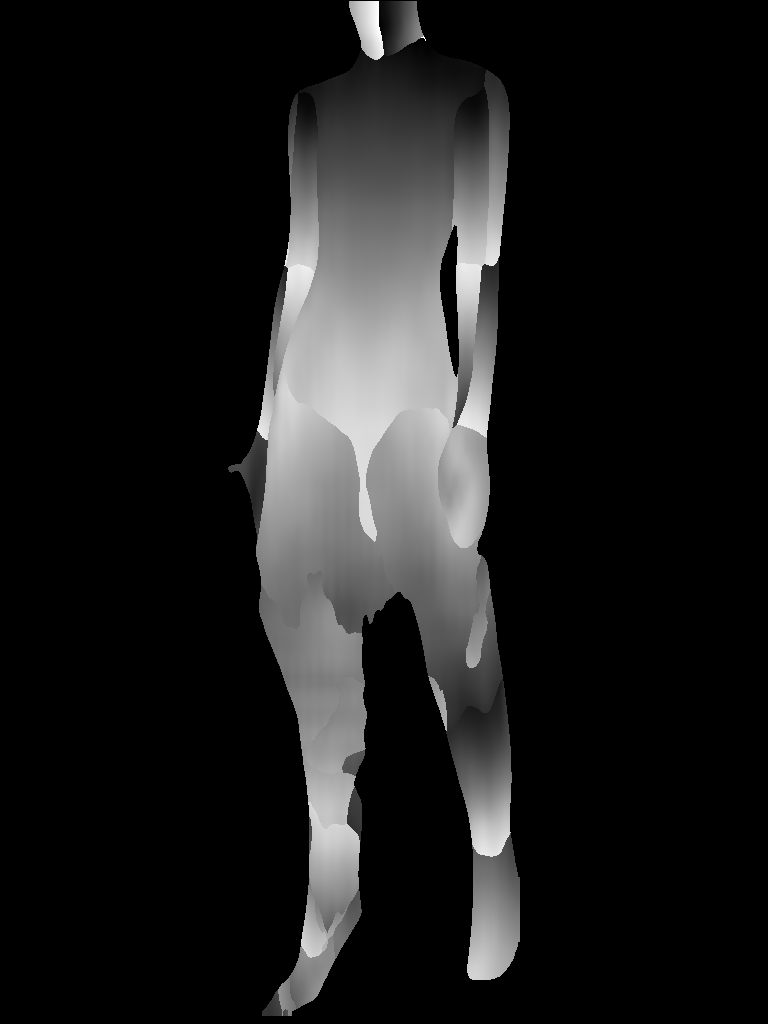

In [35]:
image

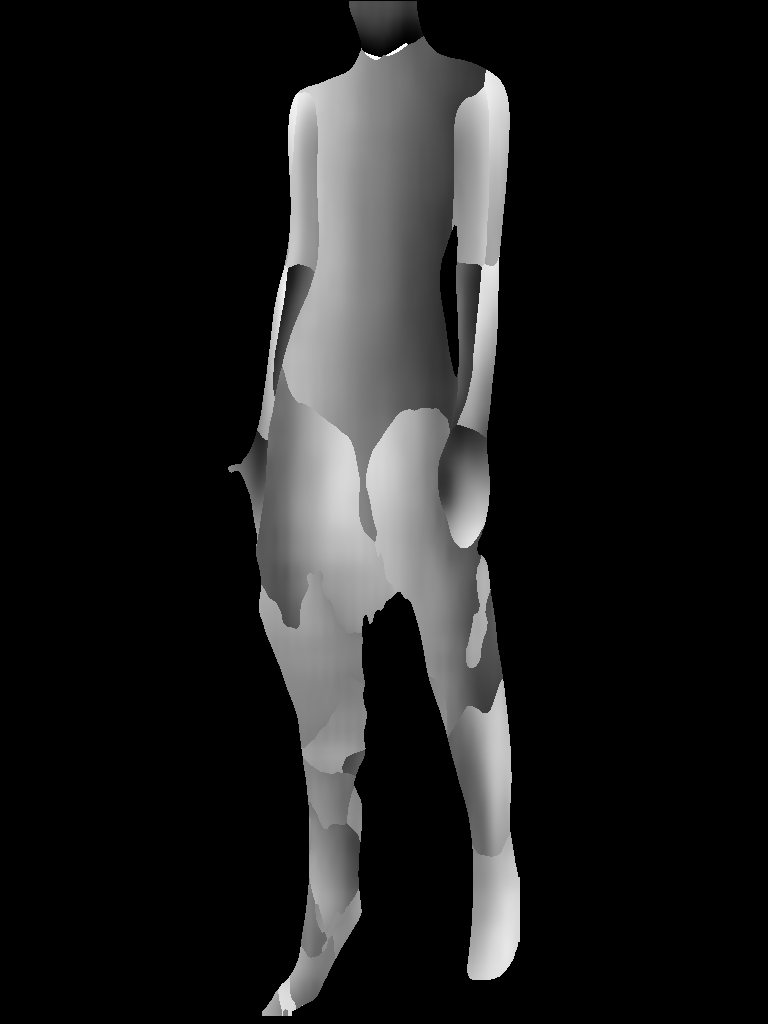

In [36]:
image_array = data['uv'][1]
image = Image.fromarray(np.uint8(image_array * 255))
image

In [50]:
label = Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dense/020714_5.png')

In [47]:
hp = Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/label_maps/020714_4.png')

In [49]:
tt(hp)

tensor[1, 1024, 768] n=786432 x∈[0., 0.063] μ=0.009 σ=0.016

In [37]:
img = Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/train/image-densepose/00000_00.jpg')

In [42]:
from torchvision.transforms import ToTensor


tt = ToTensor()

In [44]:
tt(img)

tensor[3, 1024, 768] n=2359296 x∈[0., 1.000] μ=0.222 σ=0.323

In [45]:
tt(image)

tensor[1, 1024, 768] n=786432 x∈[0., 1.000] μ=0.114 σ=0.233

In [27]:
image_array = data['uv'][0]
image_array_2d = image_array.transpose((1, 2, 0))
image = Image.fromarray(np.uint8(image_array_2d))

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [18]:
print(list(data.keys()))

['uv']


In [22]:
image = Image.fromarray(data['uv'])

TypeError: Cannot handle this data type: (1, 1, 768), <f4